In [1]:
import numpy as np
import mne
from matplotlib.collections import LineCollection

In [2]:
from scipy import signal

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ritwik\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
data=np.load('zt_mot_epochs.npz')
data['y']

array([ 0, 12,  0, 12,  0, 12,  0, 12,  0, 11,  0, 11,  0, 12,  0,  0, 12,
        0, 11,  0,  0,  0,  0,  0, 12,  0, 11,  0, 11,  0, 12,  0,  0, 12,
        0, 12,  0,  0,  0, 12,  0, 11,  0,  0, 11,  0, 12,  0,  0,  0,  0,
        0,  0, 11,  0, 11,  0, 11,  0, 11,  0, 12,  0, 12,  0, 12,  0, 11,
        0, 11,  0,  0, 11,  0, 11,  0, 11,  0,  0,  0,  0, 12,  0, 11,  0,
        0, 11,  0,  0, 11,  0,  0, 11,  0,  0, 12,  0, 12,  0, 12,  0, 11,
        0, 11,  0, 12,  0, 12,  0, 11,  0,  0, 11,  0, 12,  0, 12,  0, 12,
        0,  0, 12,  0,  0, 11,  0, 12,  0, 11,  0,  0, 12,  0,  0, 11,  0,
       11,  0,  0, 11,  0,  0, 12,  0, 12,  0, 12,  0, 11,  0,  0])

In [48]:
data['X'].shape

(151, 48, 3000)

In [6]:


def plot_eeg(EEG, vspace=100, color='k'):
    '''
    Plot the EEG data, stacking the channels horizontally on top of each other.

    Parameters
    ----------
    EEG : array (channels x samples)
        The EEG data
    vspace : float (default 100)
        Amount of vertical space to put between the channels
    color : string (default 'k')
        Color to draw the EEG in
    '''
    
    bases = vspace * arange(1) # vspace * 0, vspace * 1, vspace * 2, ..., vspace * 6
    
    # To add the bases (a vector of length 7) to the EEG (a 2-D Matrix), we don't use
    # loops, but rely on a NumPy feature called broadcasting:
    # http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
    EEG = EEG.T + bases
    
    # Calculate a timeline in seconds, knowing that the sample rate of the EEG recorder was 2048 Hz.
    samplerate = 1000.
    time = arange(EEG.shape[0]) / samplerate
    
    # Plot EEG versus time
    plot(time, EEG, color=color)

    # Add gridlines to the plot
    grid()
    
    # Label the axes
    xlabel('Time (s)')
    ylabel('Channel')
    
    # The y-ticks are set to the locations of the electrodes. The international 10-20 system defines
    # default names for them.
    gca().yaxis.set_ticks(bases)
    List = []
    for i in range (1):
        List.append("E" + "i")
    gca().yaxis.set_ticklabels(List)
    
    # Put a nice title on top of the plot
    title('ERP Plot')



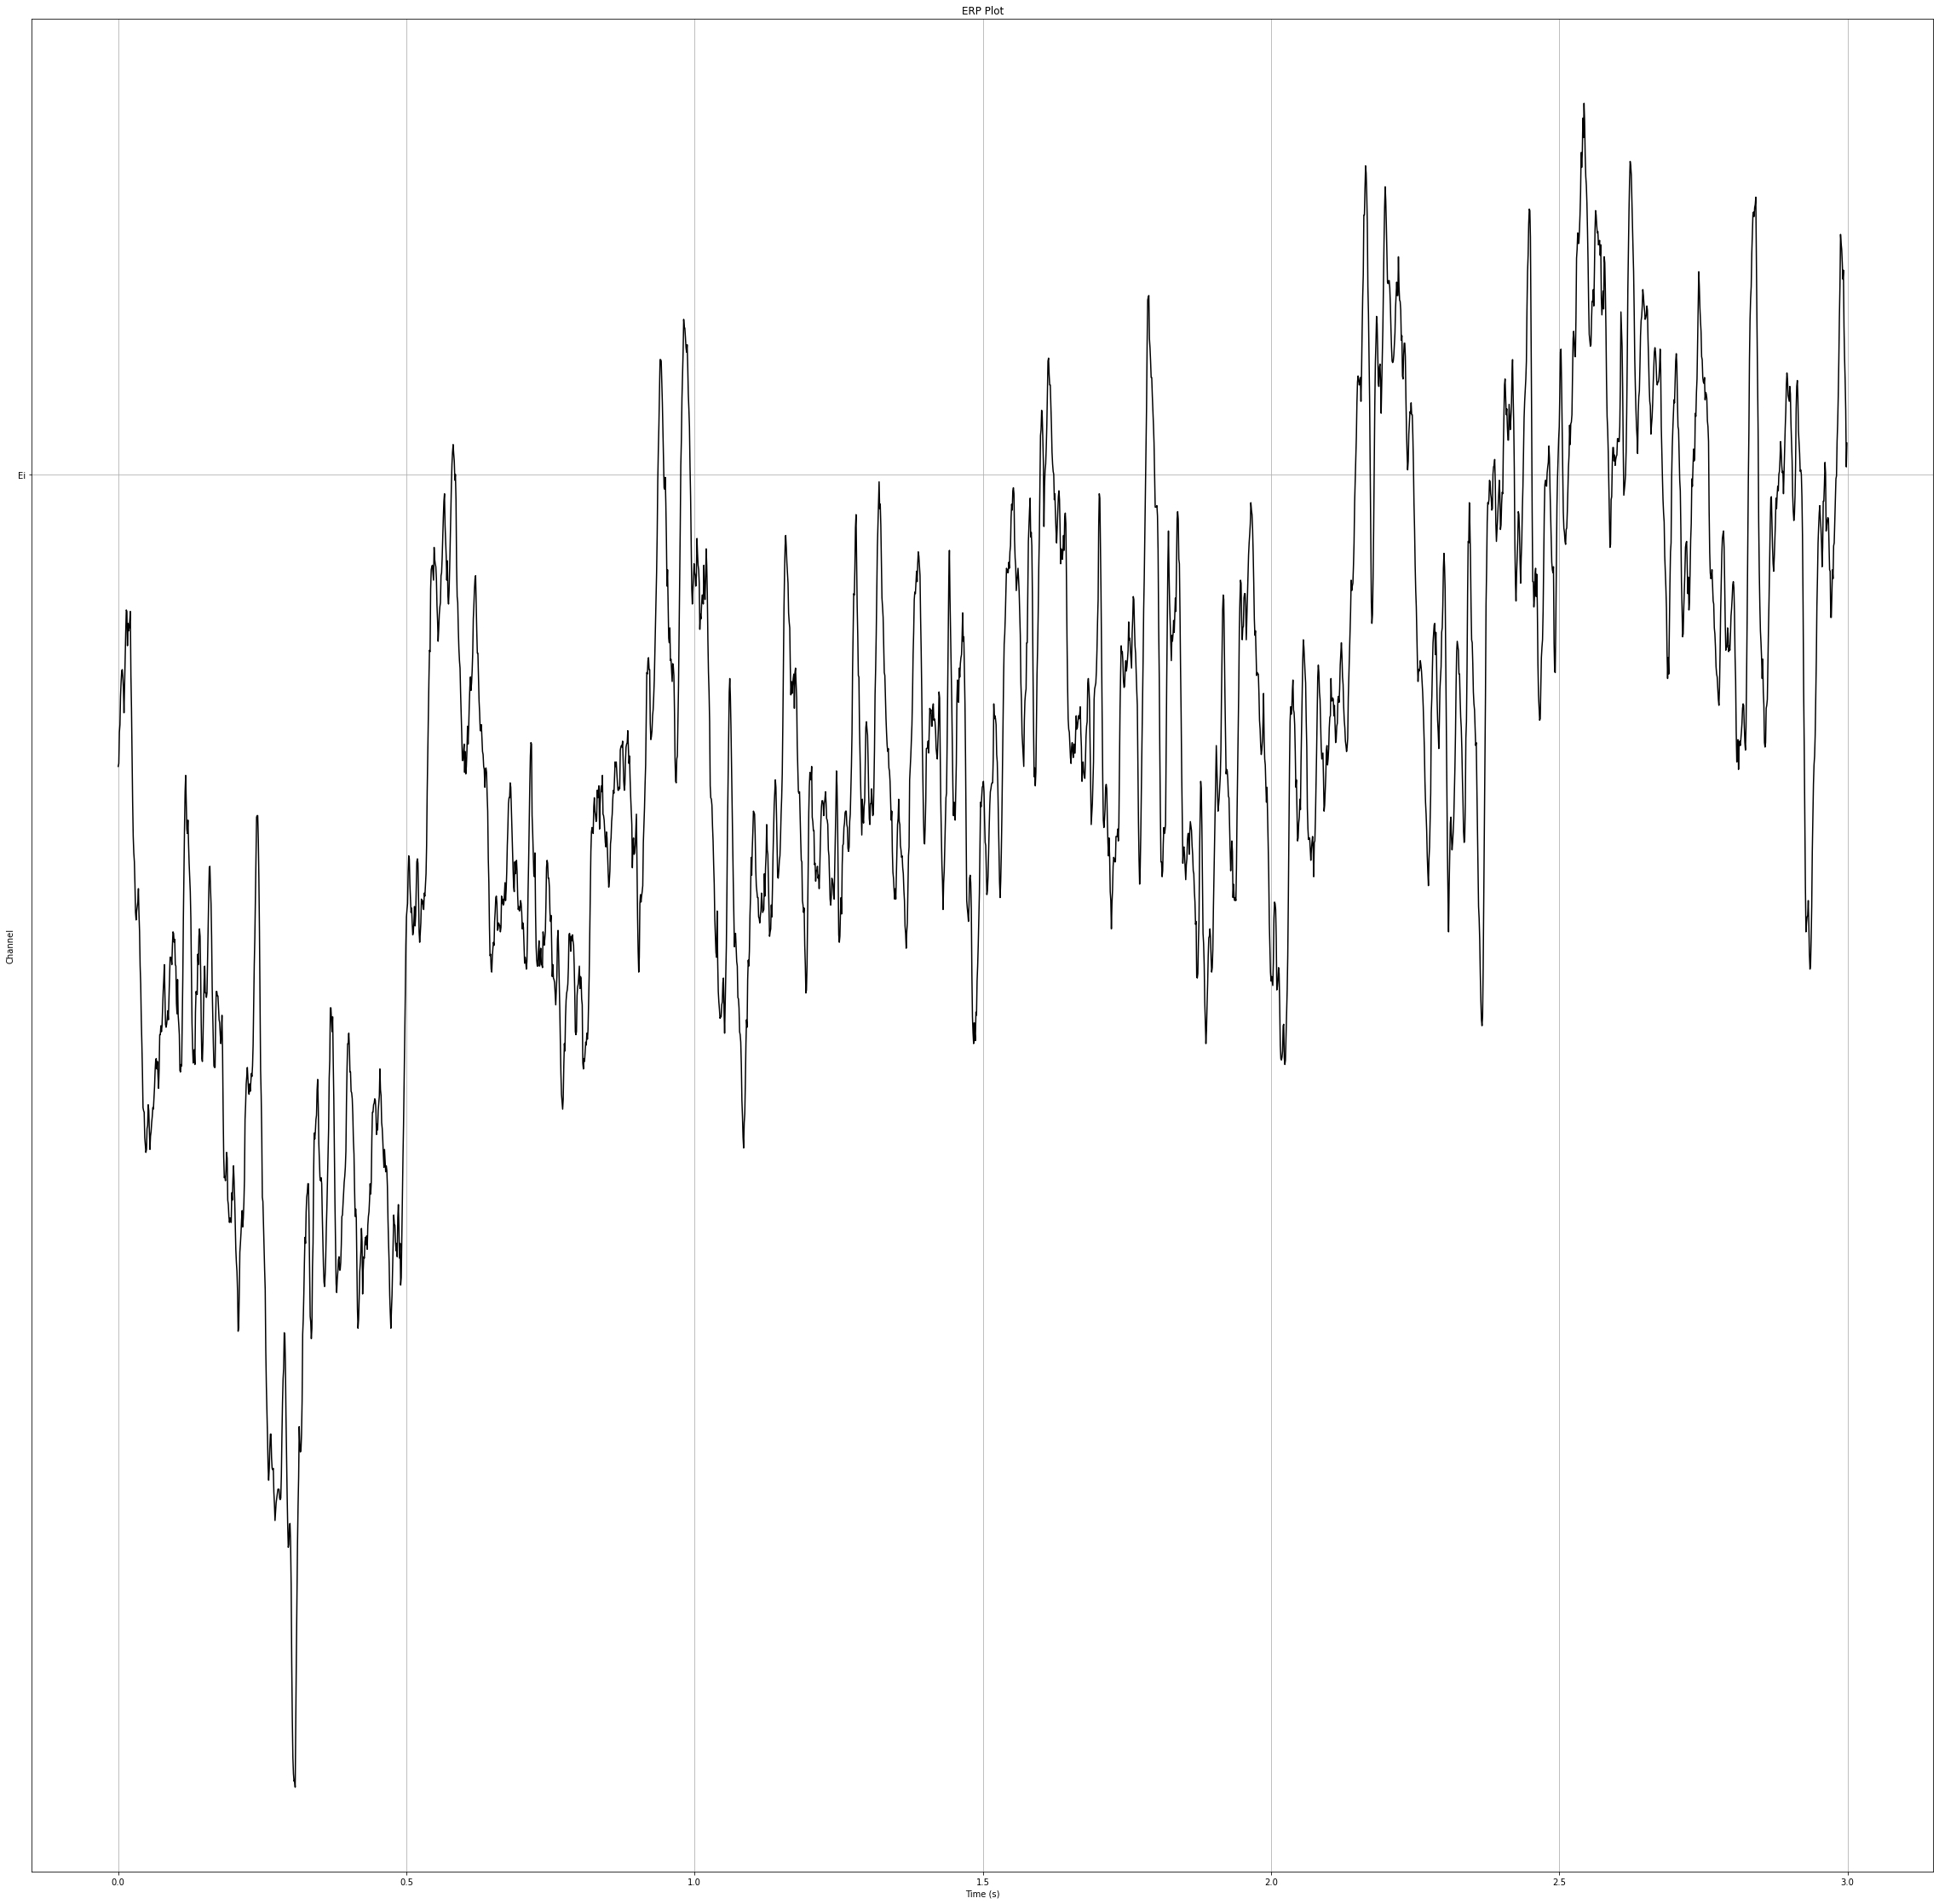

In [7]:
figure(figsize=(40, 40))
plot_eeg(data["X"][0, 1, :], vspace=120)

In [6]:
data_2=data["X"]
#data_2[0, 0, :]

In [7]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
  
# Create/view notch filter
samp_freq = 1000  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 20.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))


for i in range(data_2.shape[0]):
    for j in range(data_2.shape[1]):
        data_2[i, j, :] = signal.filtfilt(b_notch, a_notch, data_2[i,j,:])



<Figure size 576x432 with 0 Axes>

In [30]:
outputSignal

array([ 6.85943123,  6.80443248,  6.32139714, ..., -0.45234572,
       -0.12985498,  0.09020817])

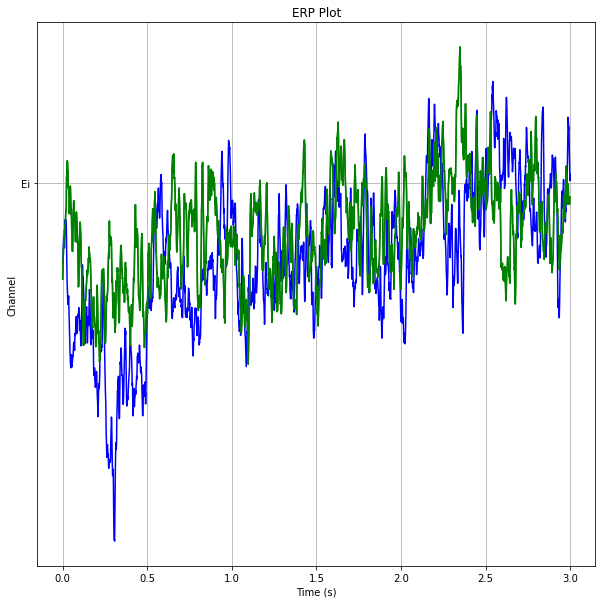

In [19]:
# Lets give each response a different color
colors = ['g', 'b']

# Plot the mean EEG response to each card, such an average is called an ERP in the literature

    
figure(figsize=(10,10))

erp1 = data_2[0, 1, :]
plot_eeg(erp1, vspace=10, color=colors[1])


erp = data_2[1, 1, :]
plot_eeg(erp, vspace=10, color=colors[0])

#plot_eeg(np.mean(data_2[np.where(data["events"] == 1)[0], i, :], axis=0), vspace=10, color = "r")
plot_eeg(erp, vspace=10, color=colors[0])



In [37]:
from matplotlib import mlab
from scipy import signal

def psd(trials):
    '''
    Calculates for each trial the Power Spectral Density (PSD).
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEG signal
    
    Returns
    -------
    trial_PSD : 3d-array (channels x PSD x trials)
        the PSD for each trial.  
    freqs : list of floats
        Yhe frequencies for which the PSD was computed (useful for plotting later)
    '''
    
    ntrials = trials.shape[2]
    nchannels = trials.shape[0]
    nsamples = trials.shape[1]
    sample_rate=1000
    trials_PSD = np.zeros((nchannels, 1501, ntrials))

    # Iterate over trials and channels
    for trial in range(ntrials):
        for ch in range(nchannels):
            # Calculate the PSD
            (PSD, freqs) = mlab.psd(trials[ch,:,trial], NFFT=int(nsamples), Fs=sample_rate)
            trials_PSD[ch, :, trial] = PSD.ravel()
                
    return trials_PSD, freqs

In [30]:
cl_1=data_2[np.where(data["events"] == 1)[0], :, :]
cl_1=np.moveaxis(cl_1, 0, -1)
#cl_1=bandpass(cl_1, 8, 15, 1000)
cl_1.shape

(64, 3000, 139)

In [31]:
cl_2=data_2[np.where(data["events"] == -1)[0], :, :]
cl_2=np.moveaxis(cl_2, 0, -1)
#cl_2=bandpass(cl_2, 8, 15, 1000)
cl_2.shape

(64, 3000, 139)

In [32]:
cl_2[1, :, 1]

array([ 6.34375,  6.25   ,  5.90625, ..., 11.1875 , 11.53125, 11.5    ])

In [33]:
psd_r, freqs = psd(cl_1)
psd_f, freqs = psd(cl_2)
trials_PSD = {"cl1": psd_r, "cl2": psd_f}

In [34]:
trials_PSD["cl1"].shape

(64, 1501, 139)

In [35]:
import matplotlib.pyplot as plt

def plot_psd(trials, freqs, chan_ind, chan_lab=None, maxy=None):
    '''
    Plots PSD data calculated with psd().
    
    Parameters
    ----------
    trials : 3d-array
        The PSD data, as returned by psd()
    freqs : list of floats
        The frequencies for which the PSD is defined, as returned by psd() 
    chan_ind : list of integers
        The indices of the channels to plot
    chan_lab : list of strings
        (optional) List of names for each channel
    maxy : float
        (optional) Limit the y-axis to this value
    '''
    plt.figure(figsize=(15, 5))
    
    nchans = len(chan_ind)
    
    # Maximum of 3 plots per row
    nrows = np.ceil(nchans / 4)
    ncols = min(4, nchans)
    
    # Enumerate over the channels
    for i,ch in enumerate(chan_ind):
        # Figure out which subplot to draw to
        plt.subplot(nrows,ncols,i+1)
    
        # Plot the PSD for each class
        for cl in trials.keys():
            plt.plot(freqs, np.mean(trials_PSD[cl][ch,:,:], axis=1), label=cl)
    
        # All plot decoration below...
        
        plt.xlim(1,50)
        
        if maxy != None:
            plt.ylim(0,maxy)
    
        plt.grid()
    
        plt.xlabel('Frequency (Hz)')
        
        if chan_lab == None:
            plt.title('Channel %d' % (ch+1))
        else:
            plt.title(chan_lab[i])

        plt.legend()
        
    plt.tight_layout()

<ipython-input-35-cc77b78a6c09>:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrows,ncols,i+1)
<ipython-input-35-cc77b78a6c09>:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrows,ncols,i+1)
<ipython-input-35-cc77b78a6c09>:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrows,ncols,i+1)
<ipython-input-35-cc77b78a6c09>:31: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrows,ncols,i+1)


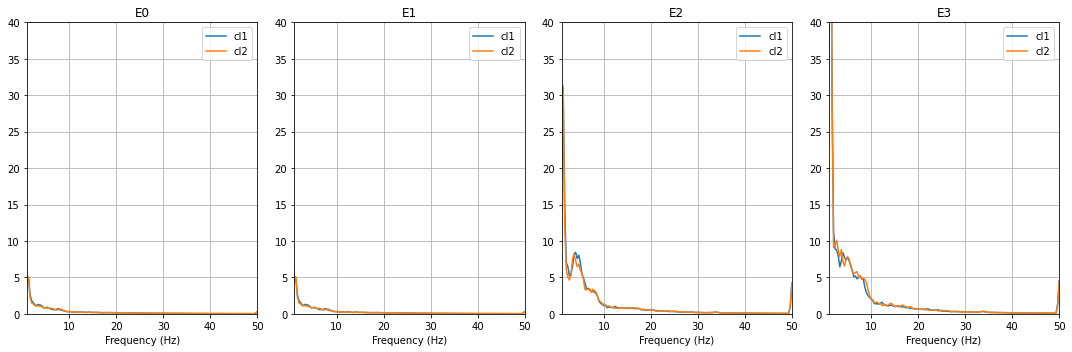

In [36]:
plot_psd(
    trials_PSD,
    freqs,
    [0, 1, 2, 3],
    chan_lab=['E0', 'E1', 'E2', "E3"],
    maxy=40
)

(0.0, 100.0)

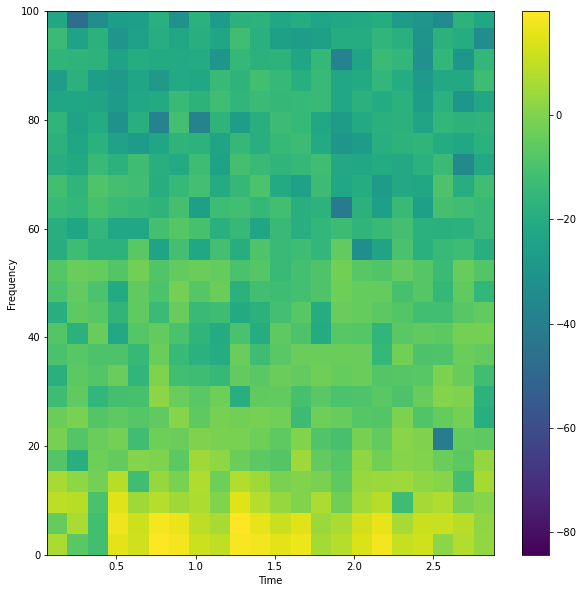

In [37]:
import matplotlib.pyplot as plot

figure(figsize=(10,10))

powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(data_2[5, 10, :], Fs=1000)

plot.xlabel('Time')

plot.ylabel('Frequency')

plot.title("")

#plot.clim(-60, 40)

plot.colorbar(imageAxis)

plot.ylim((0,100))



<ipython-input-10-df654f839dac>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(15,5))


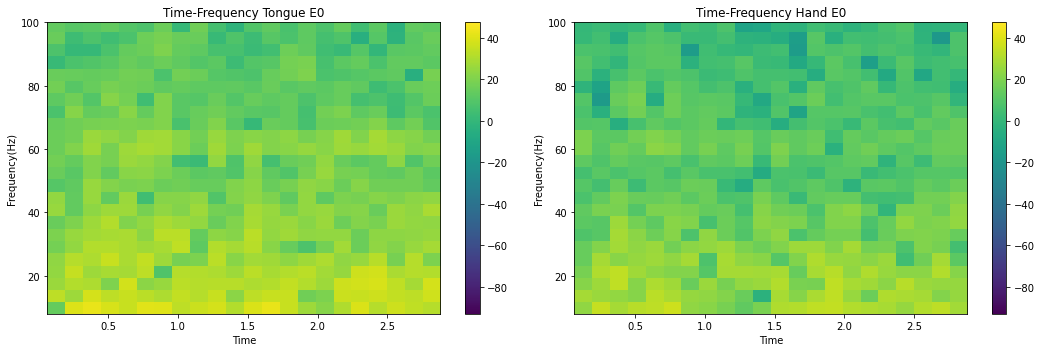

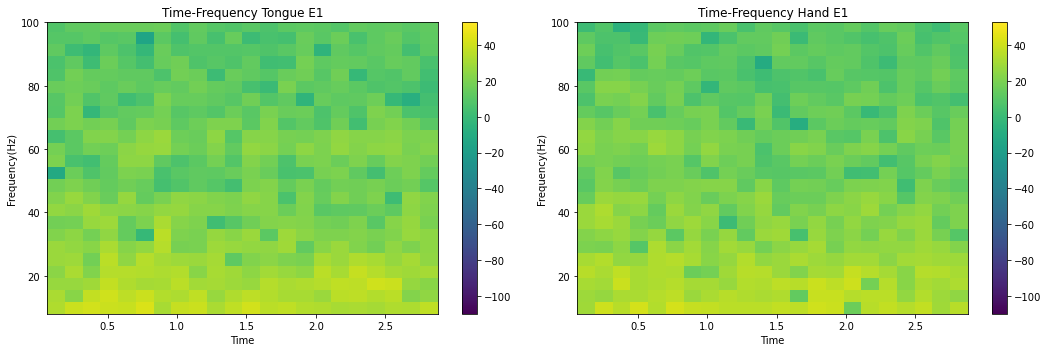

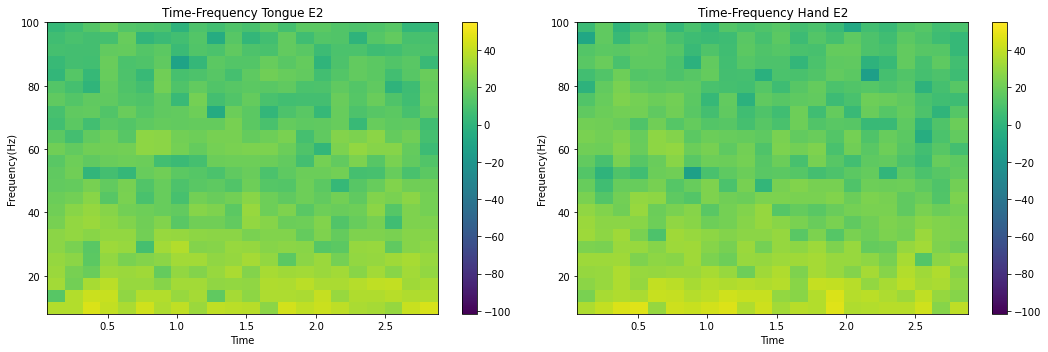

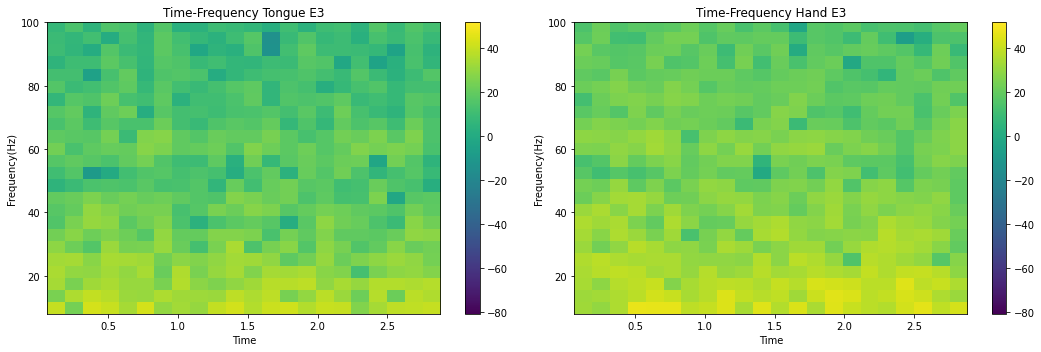

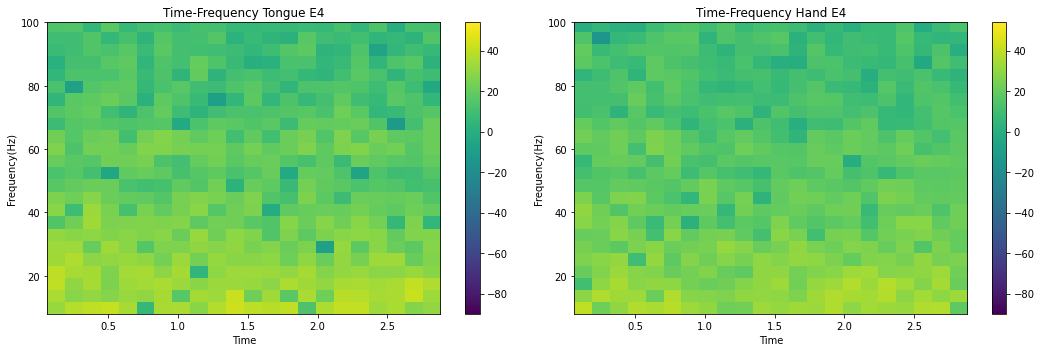

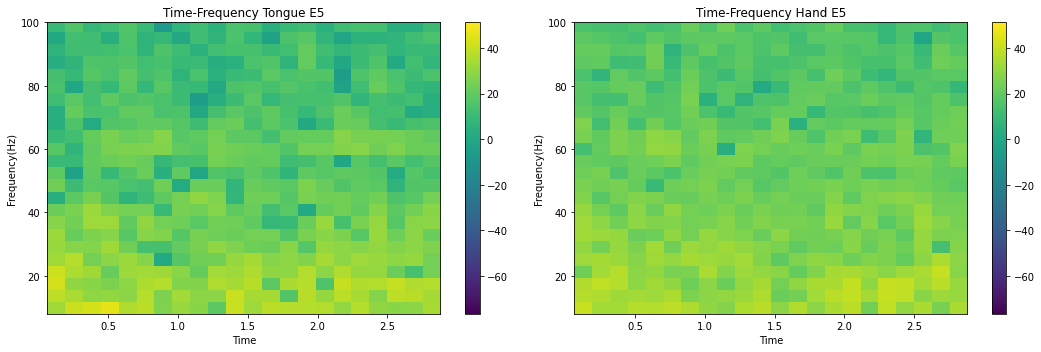

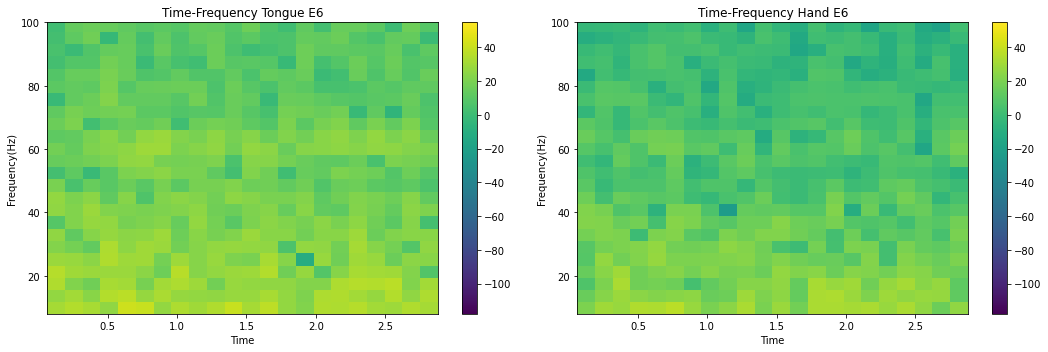

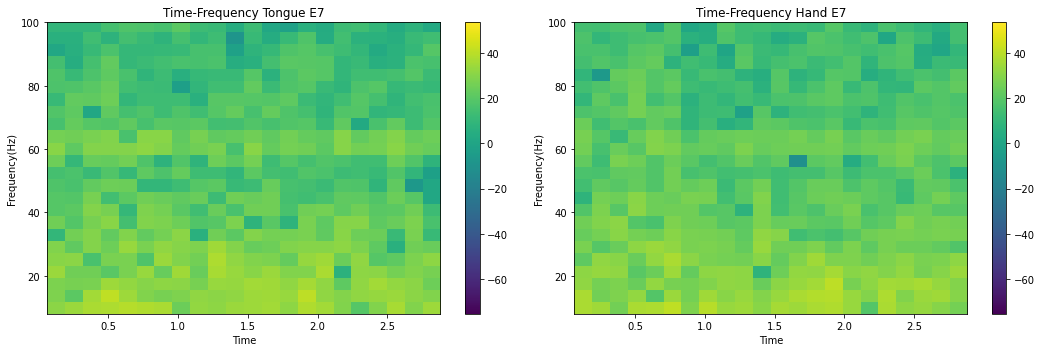

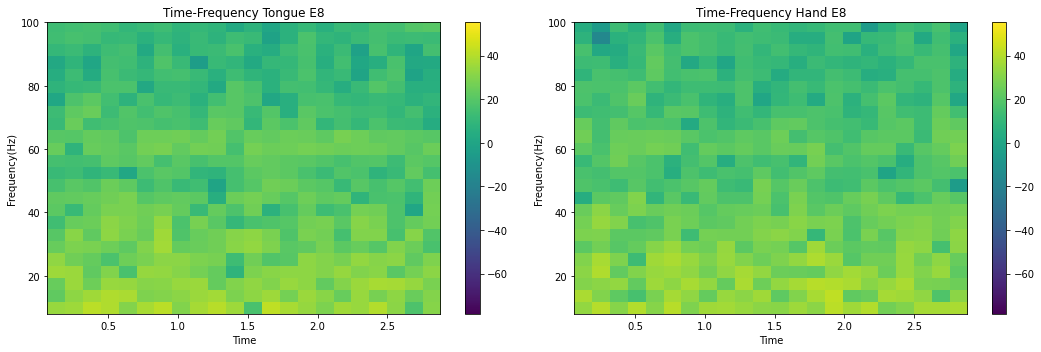

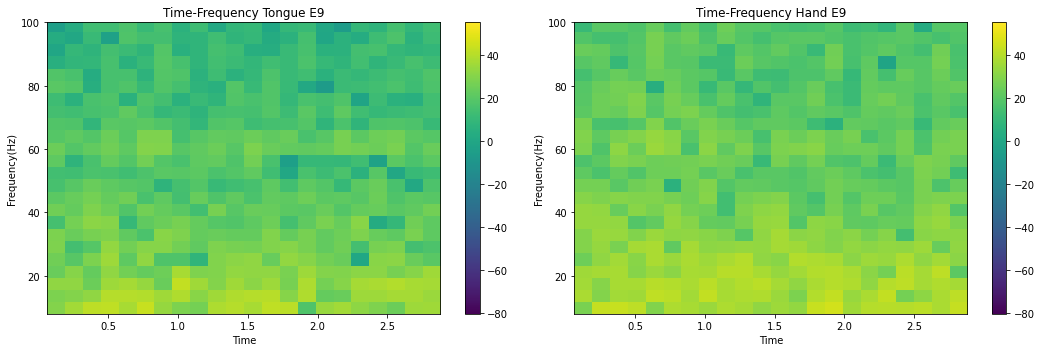

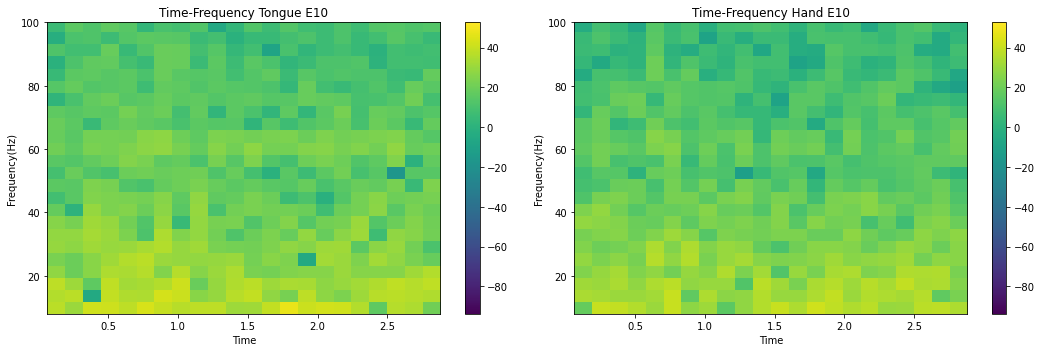

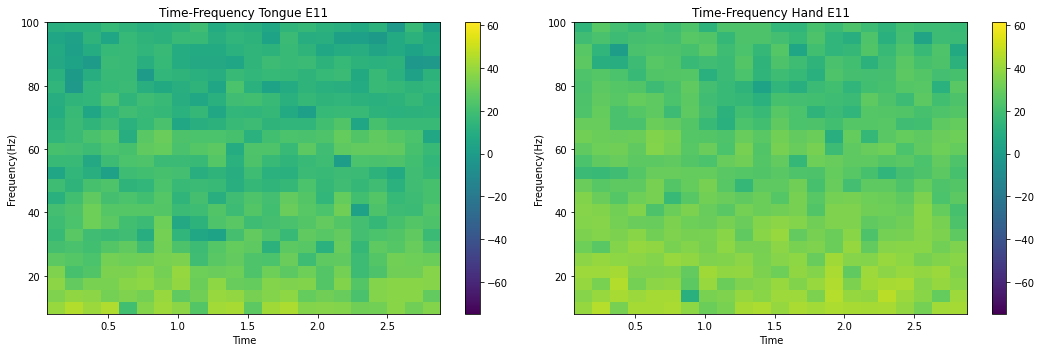

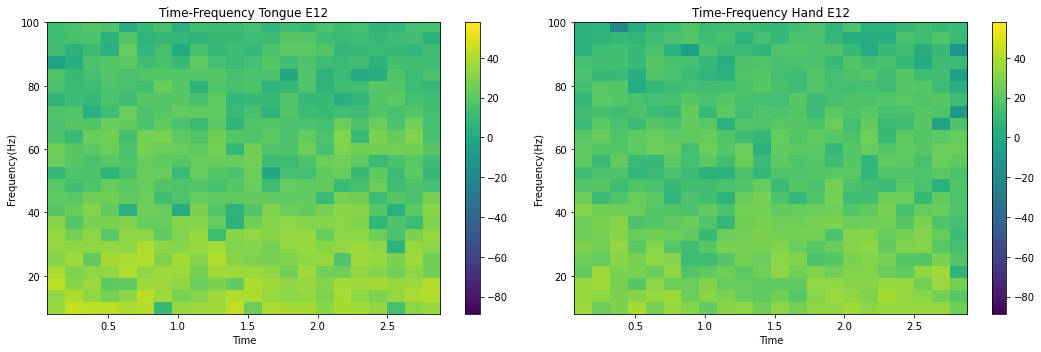

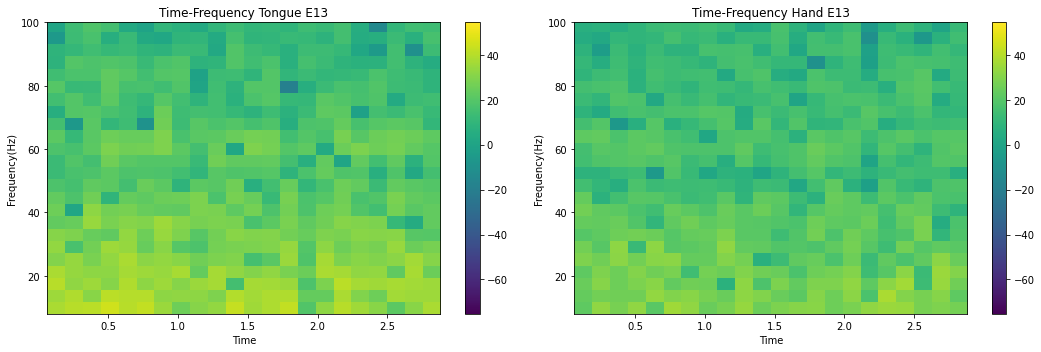

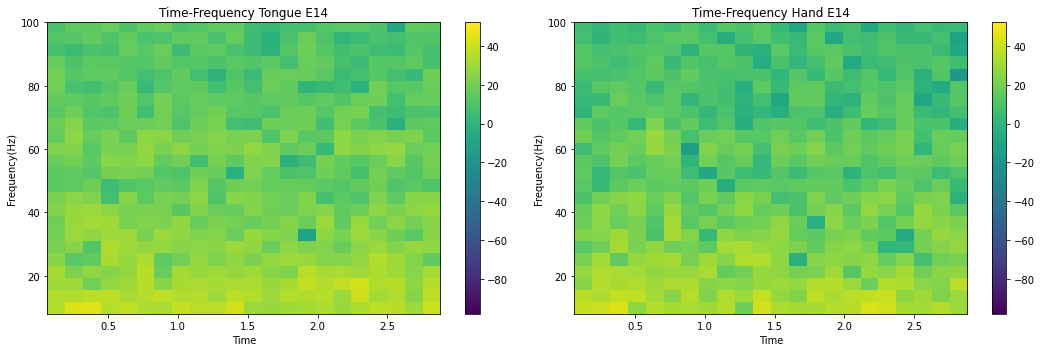

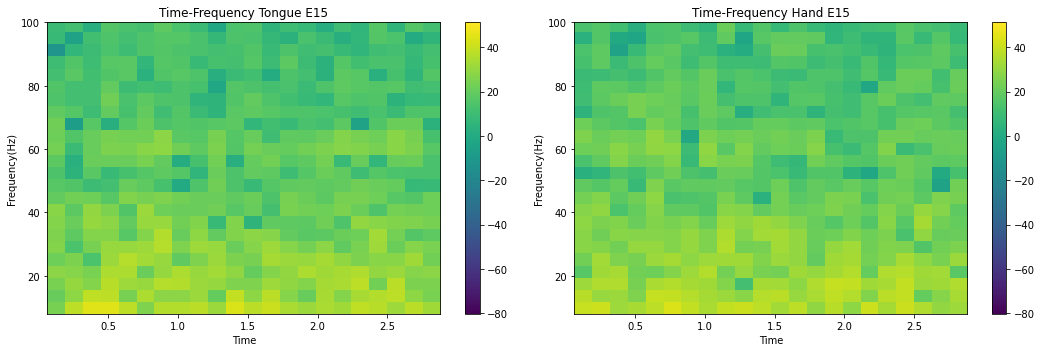

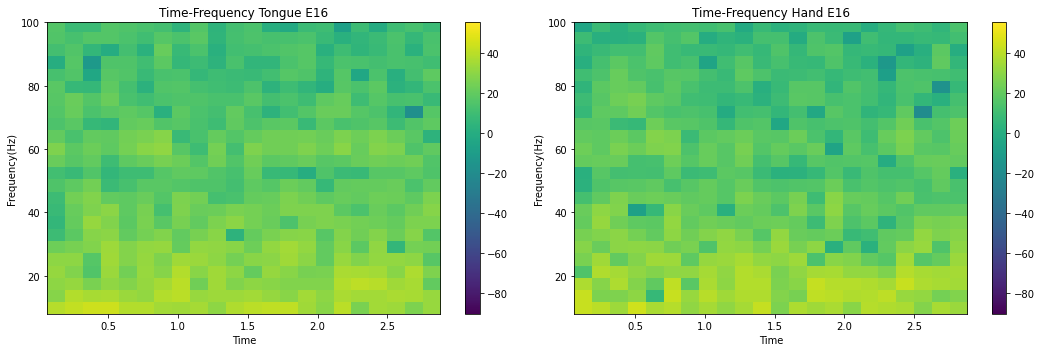

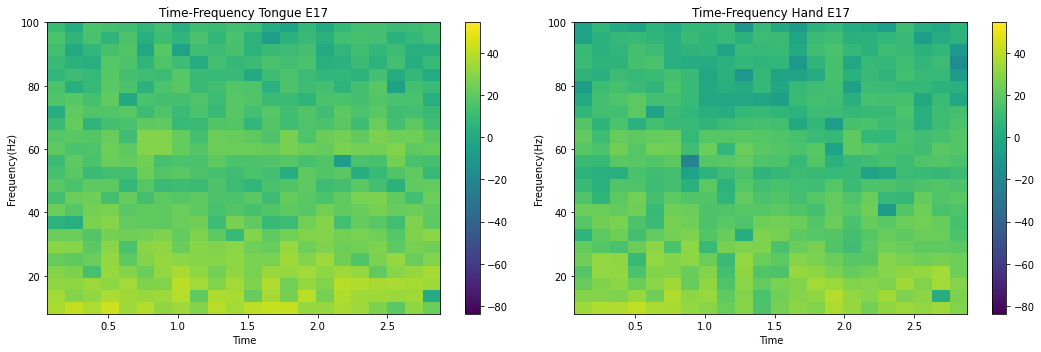

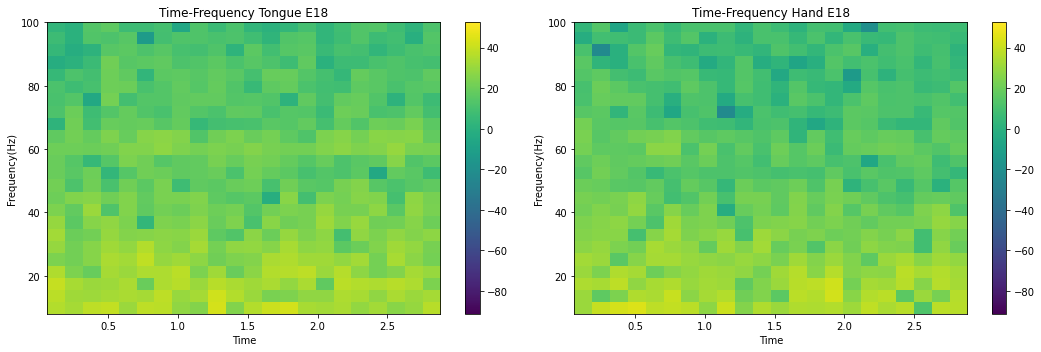

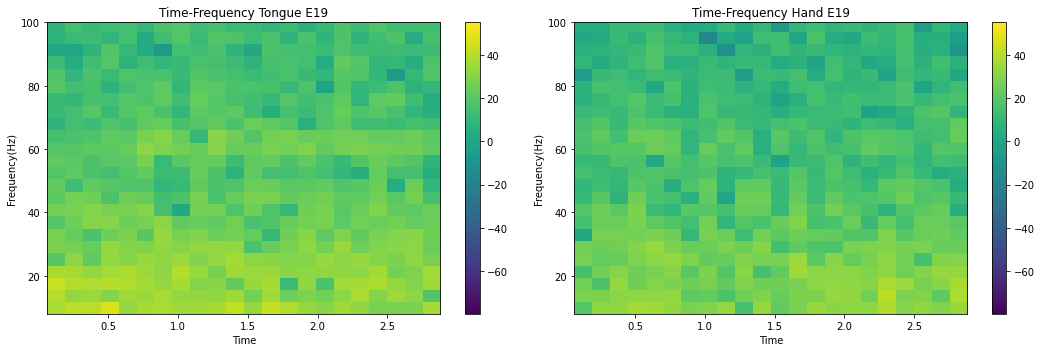

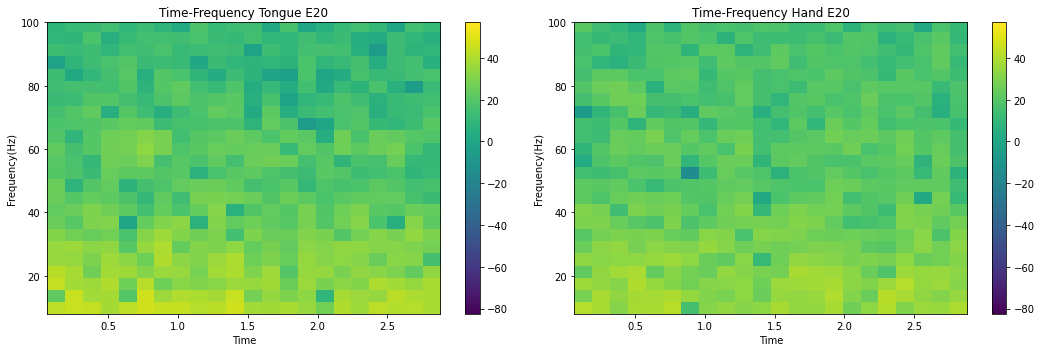

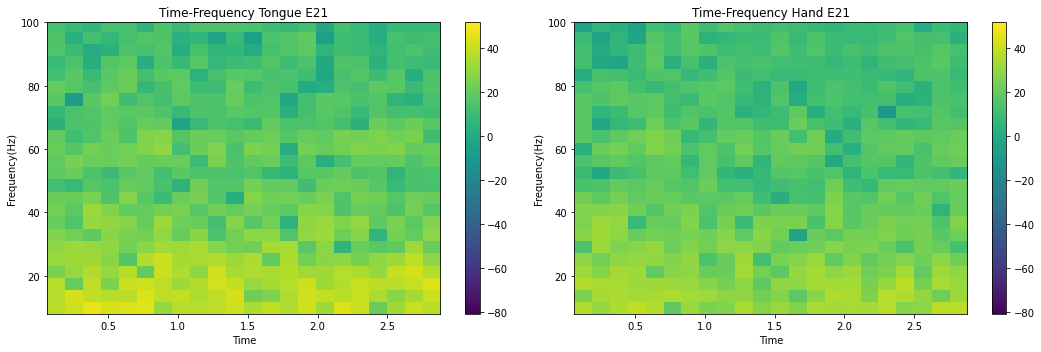

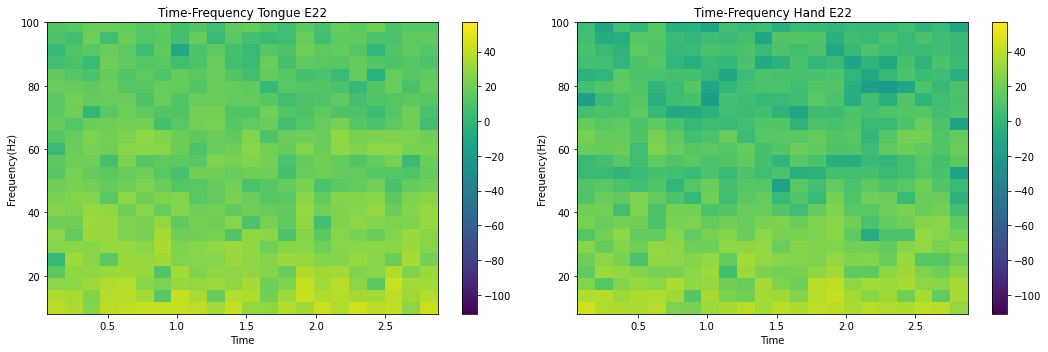

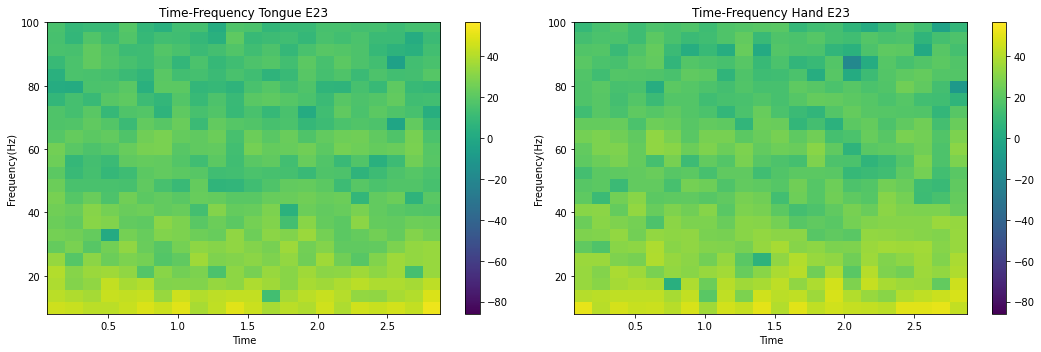

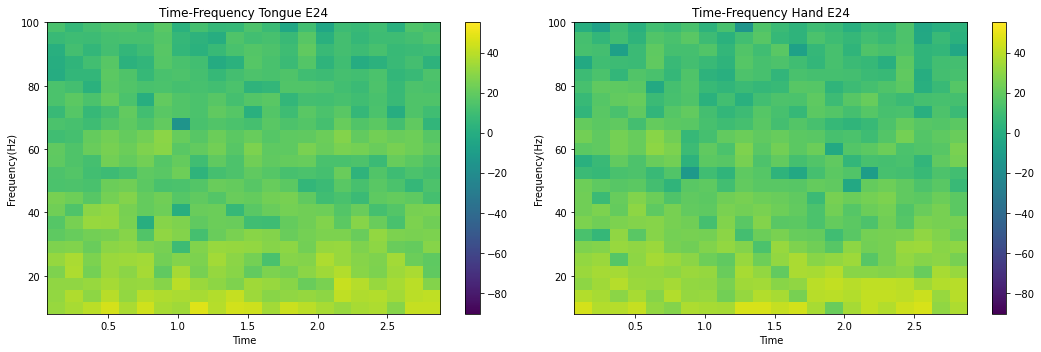

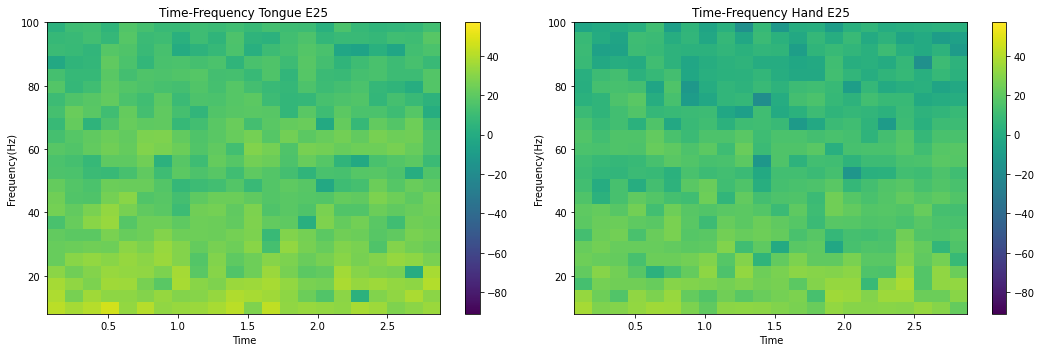

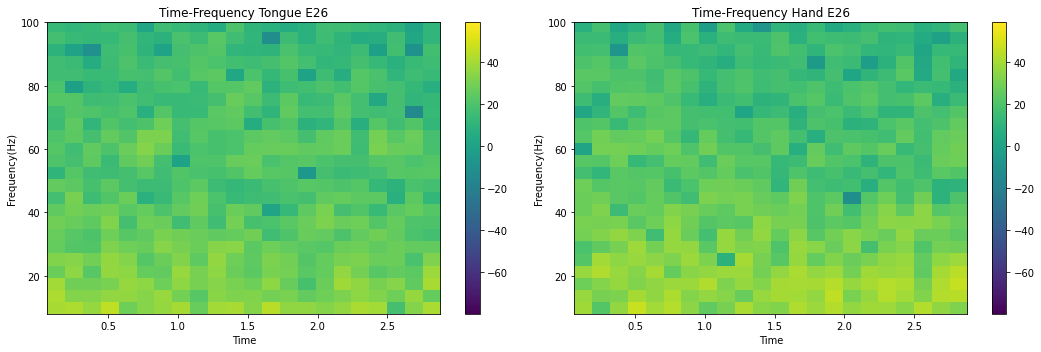

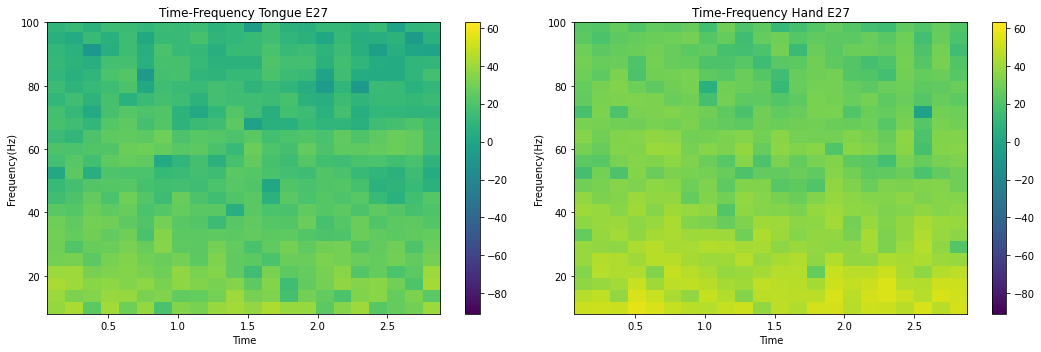

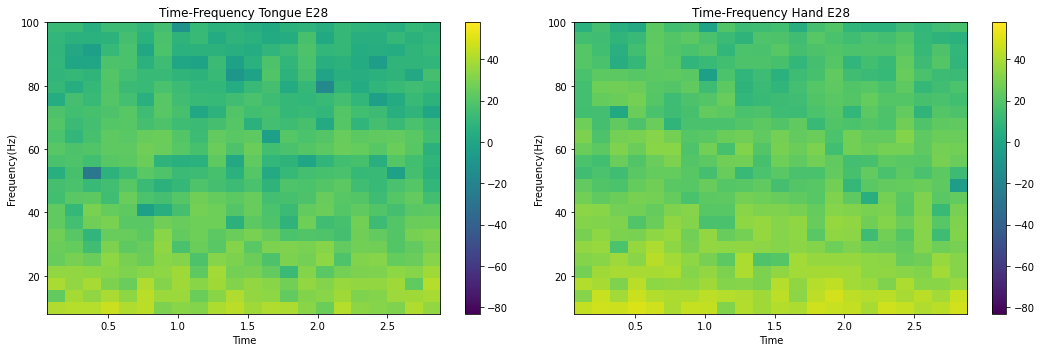

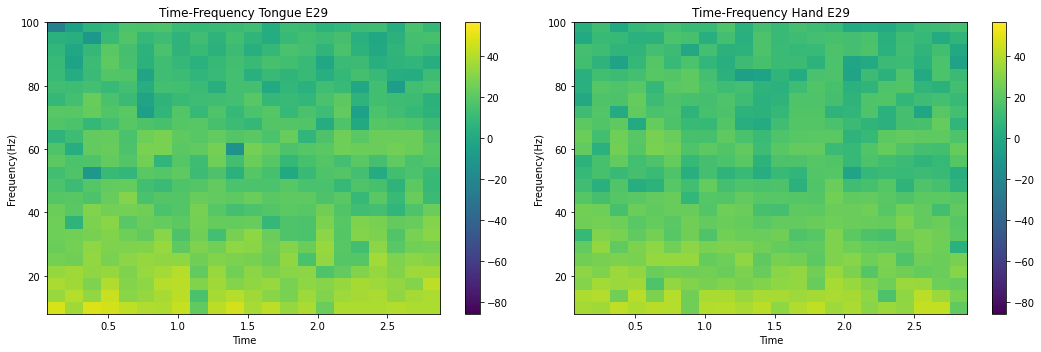

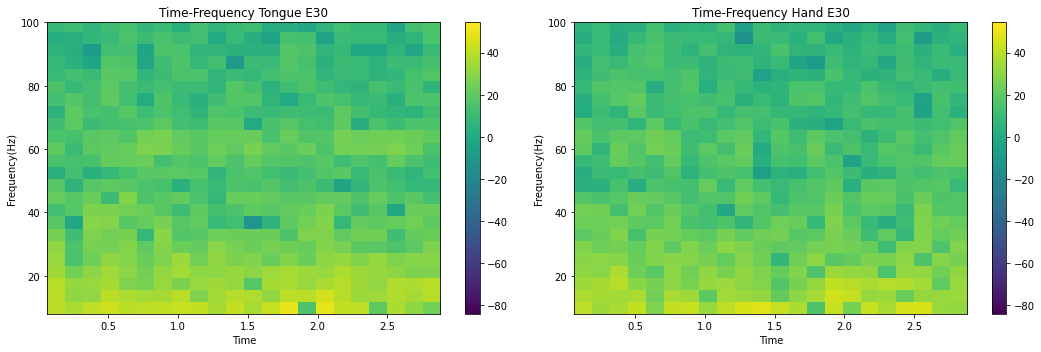

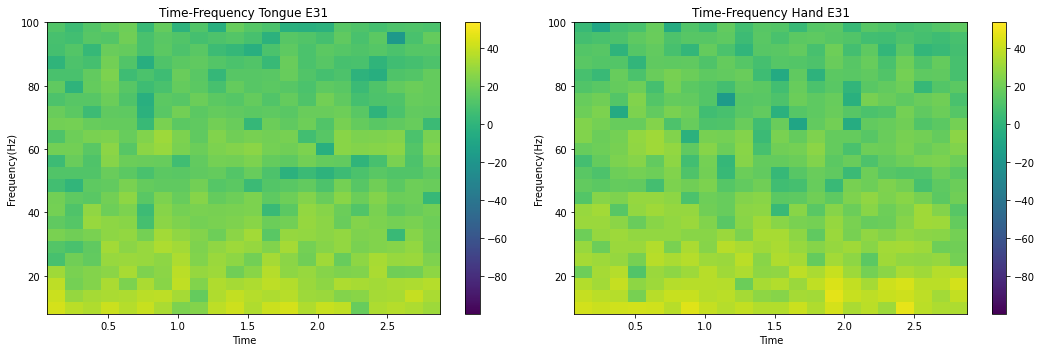

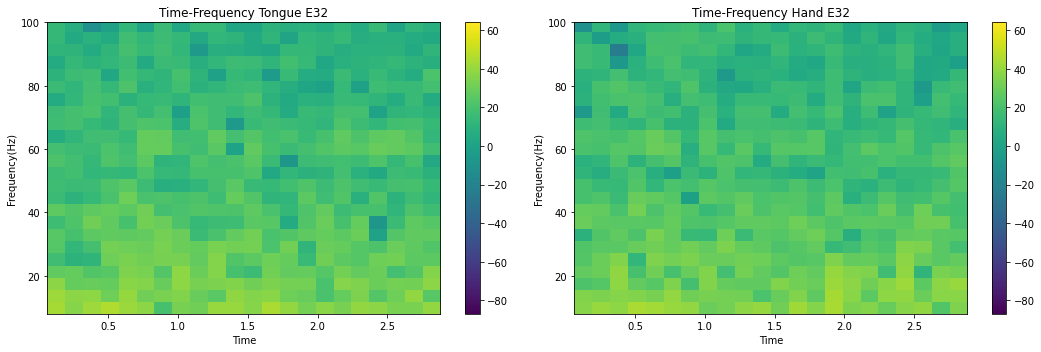

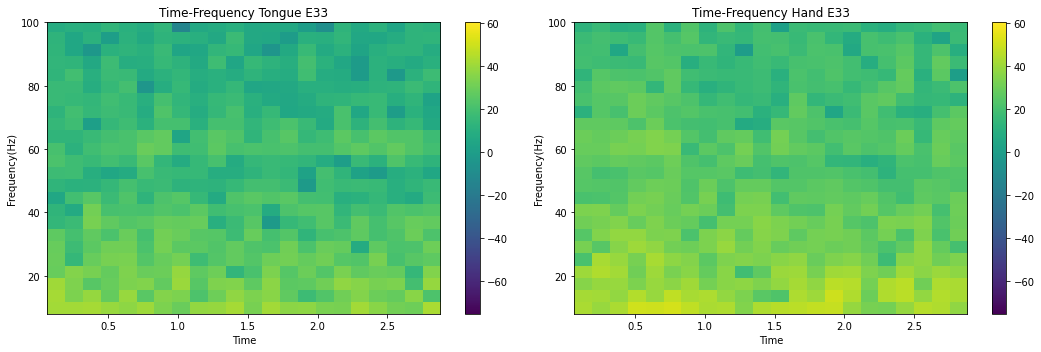

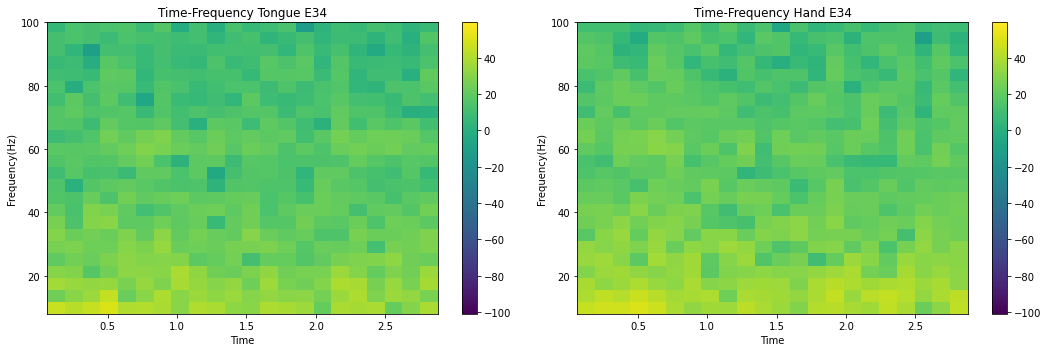

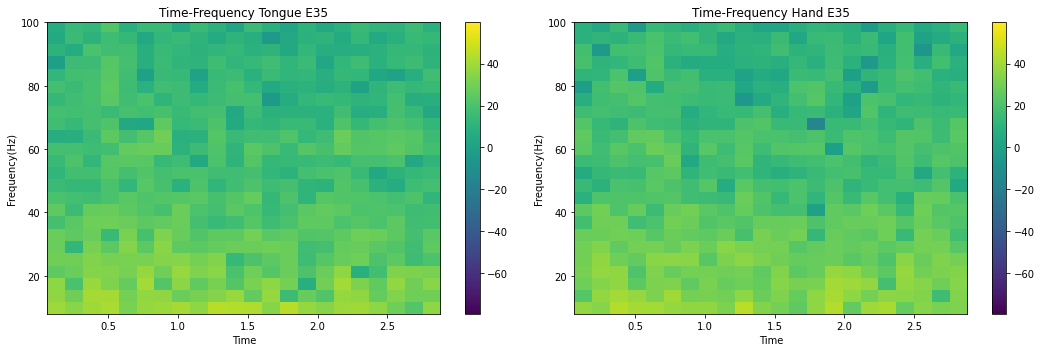

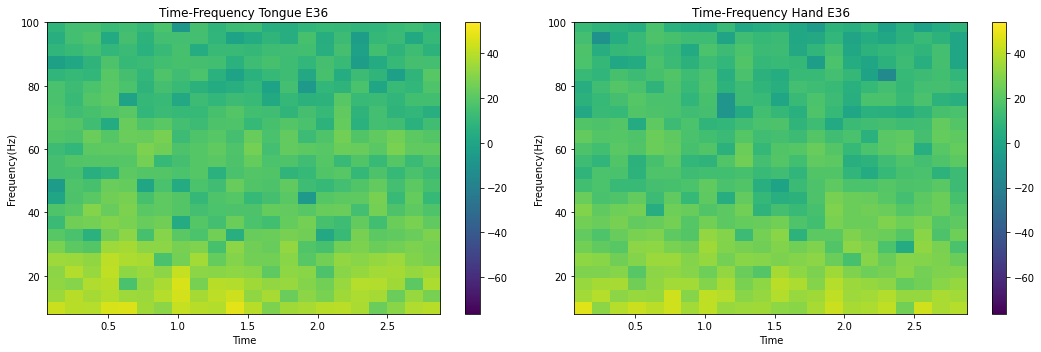

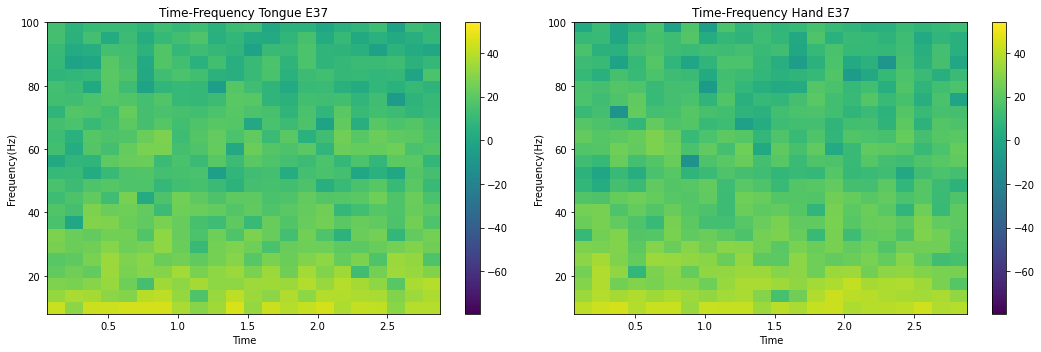

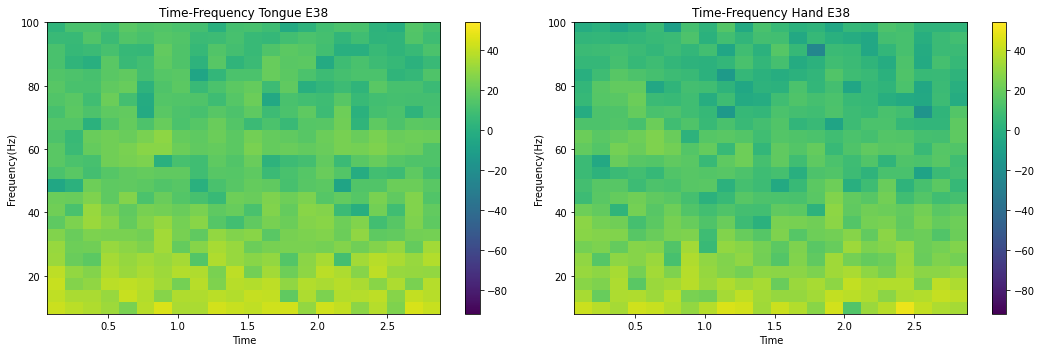

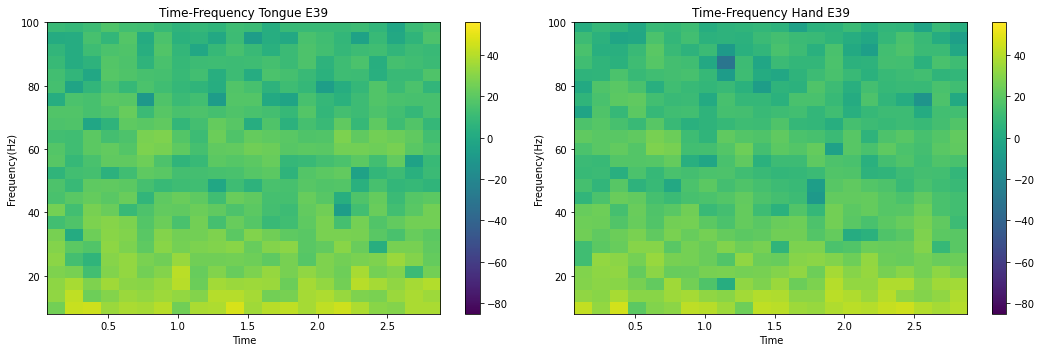

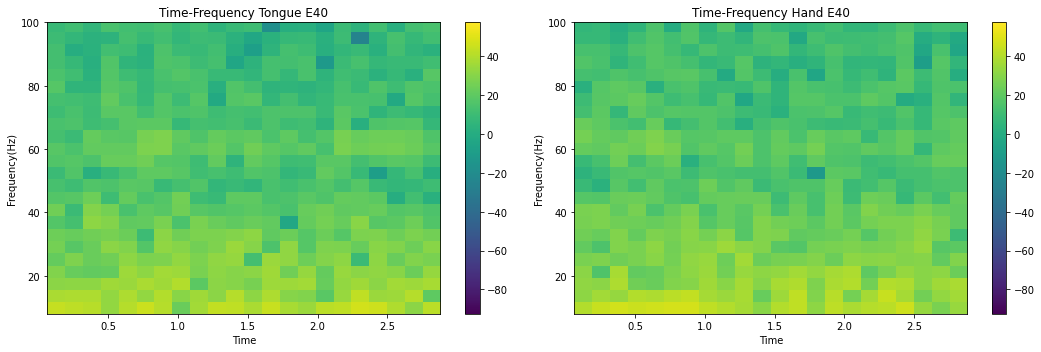

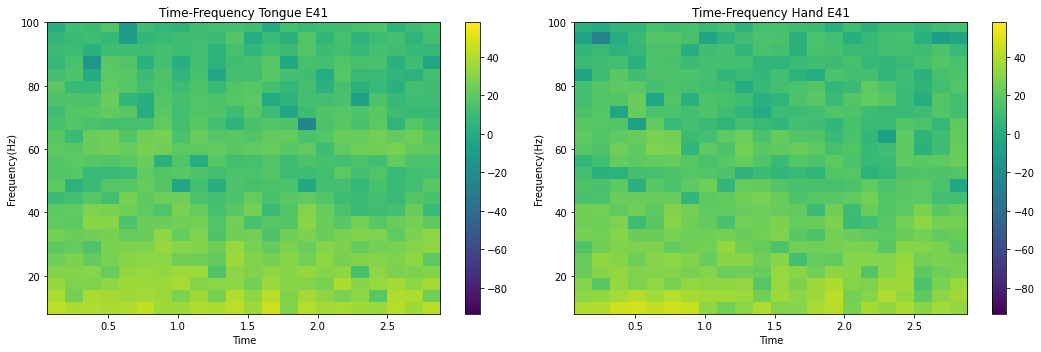

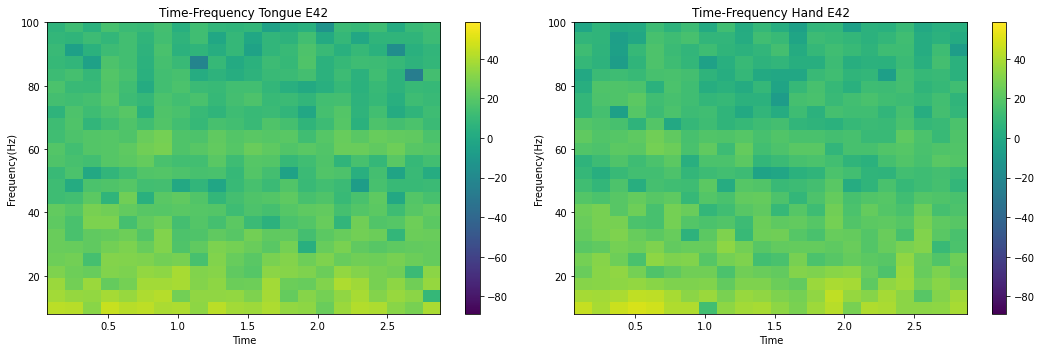

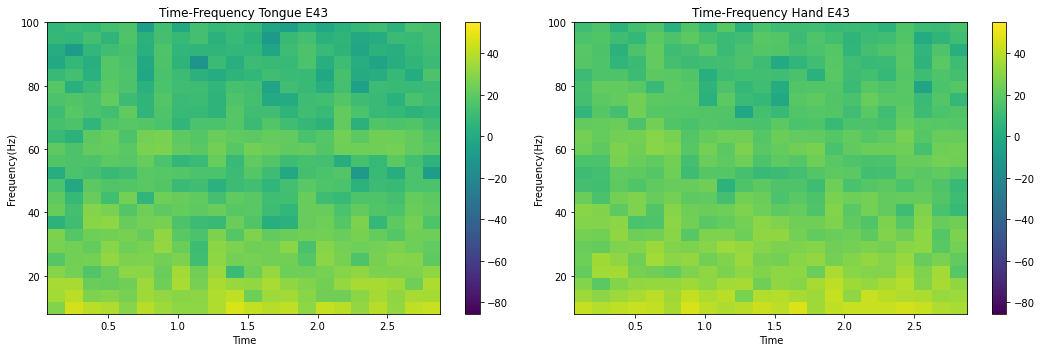

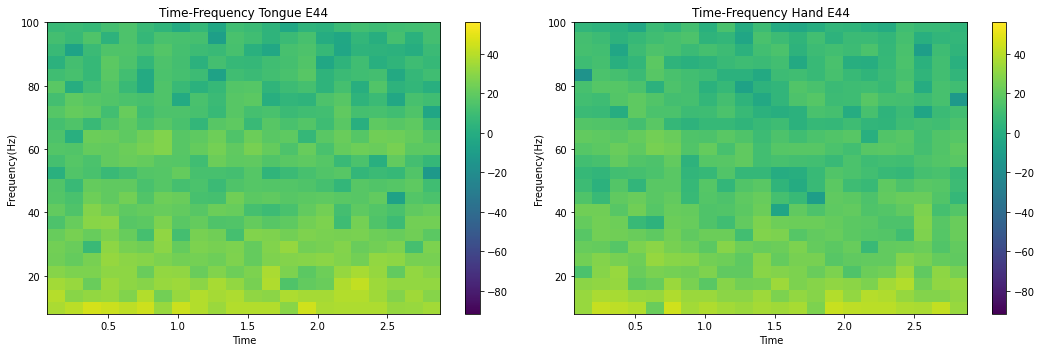

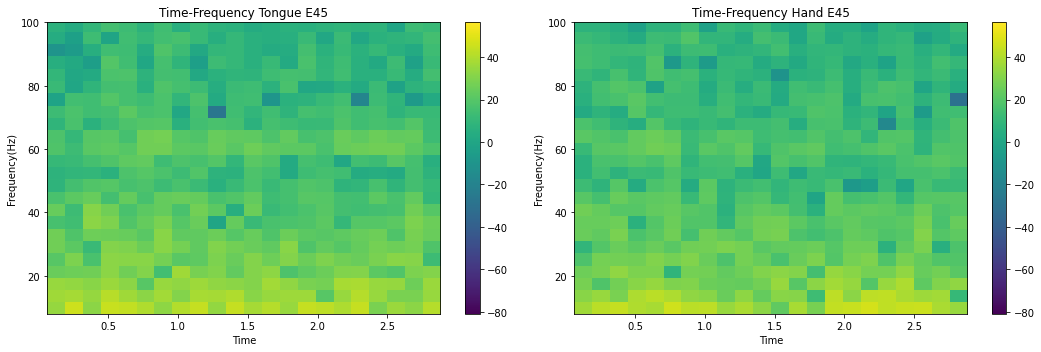

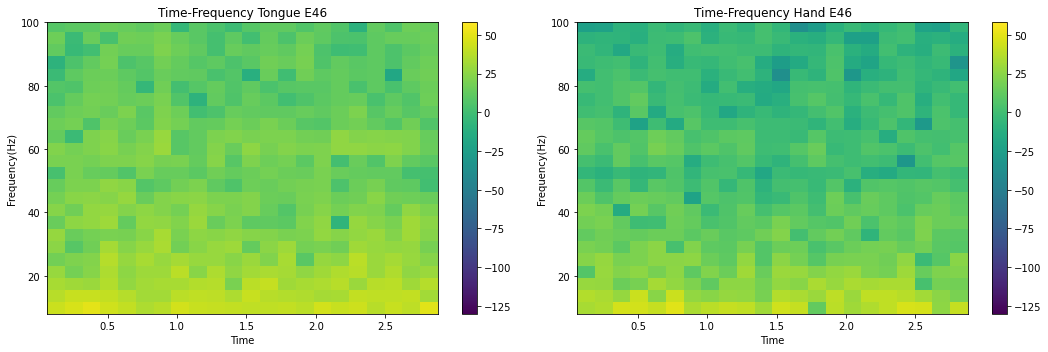

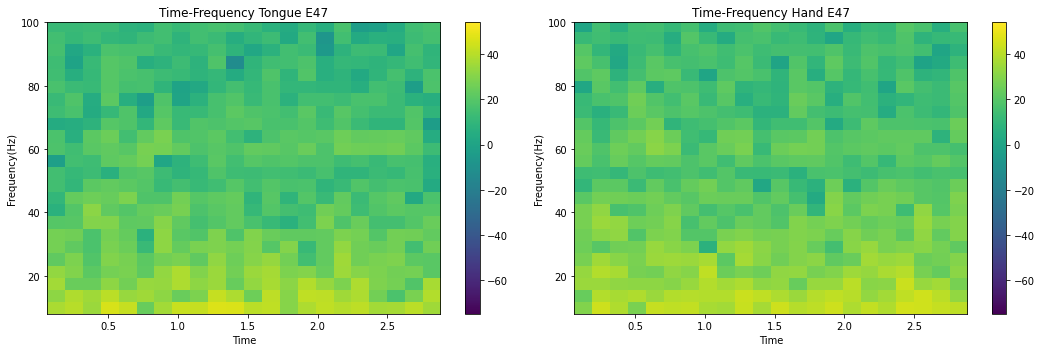

In [10]:
import matplotlib.pyplot as plot

for i in range(0,48):
    

    figure(figsize=(15,5))


    plt.subplot(1, 2, 1)
    
    plt.title("Time-Frequency Tongue E" + str(i))


    powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(np.mean(data_2[np.where(data["y"] == 11)[0], i, :], axis=0), Fs=1000)

    plot.xlabel('Time')

    plot.ylabel('Frequency(Hz)')
    
    #plot.clim(-3,3)

    plot.colorbar(imageAxis)

    plot.ylim((8,100))
    

    plt.subplot(1, 2, 2)
    
    plt.title("Time-Frequency Hand E" + str(i))

    powerSpectrum1, freqenciesFound1, time1, imageAxis1 = plot.specgram(np.mean(data_2[np.where(data["y"] == 12)[0], i, :], axis=0), Fs=1000)

    plot.xlabel('Time')

    plot.ylabel('Frequency(Hz)')
    
    #plot.clim(-3,3)

    plot.colorbar(imageAxis)

    plot.ylim((8,100))



    plot.tight_layout()




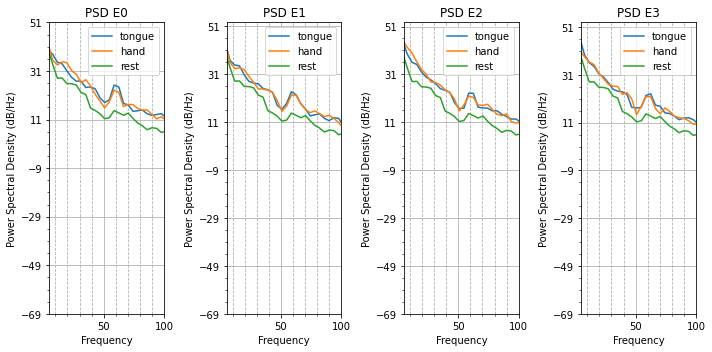

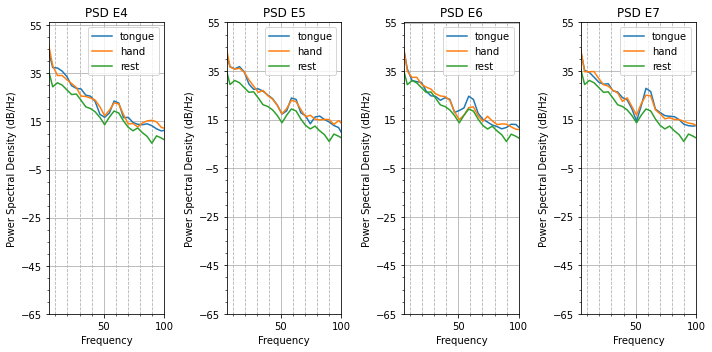

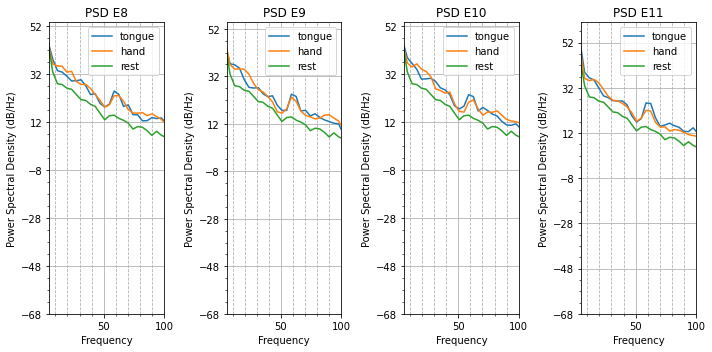

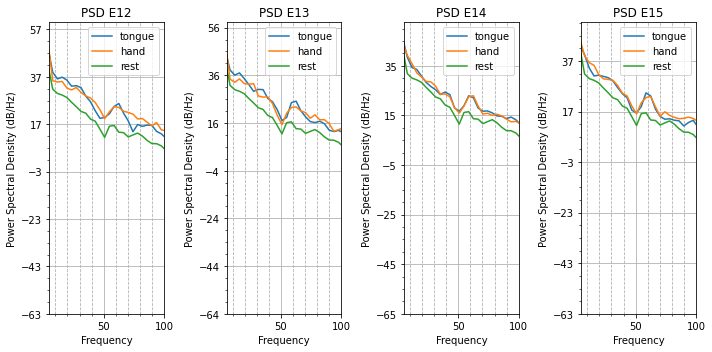

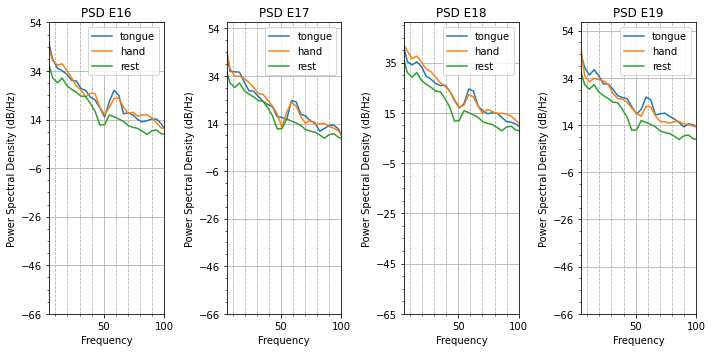

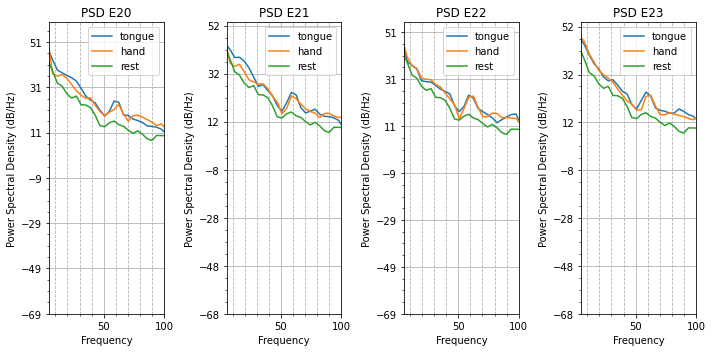

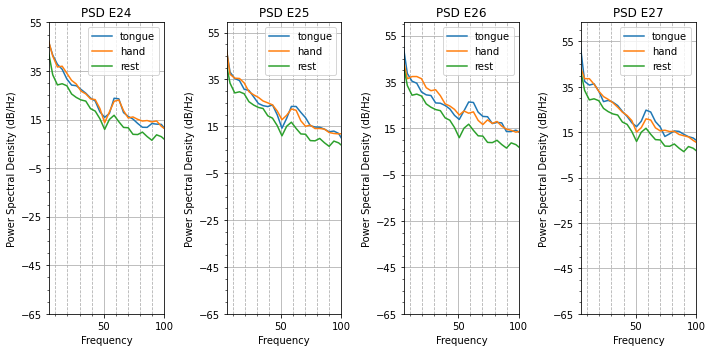

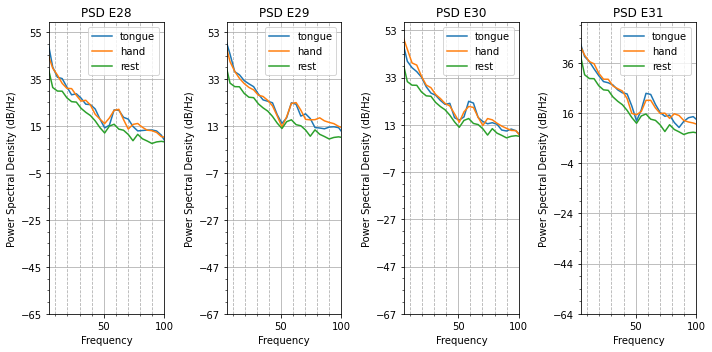

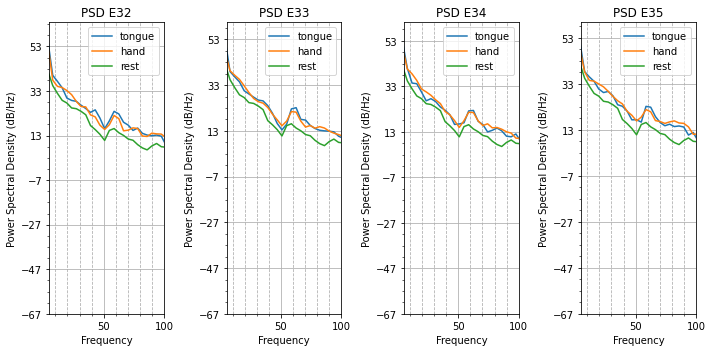

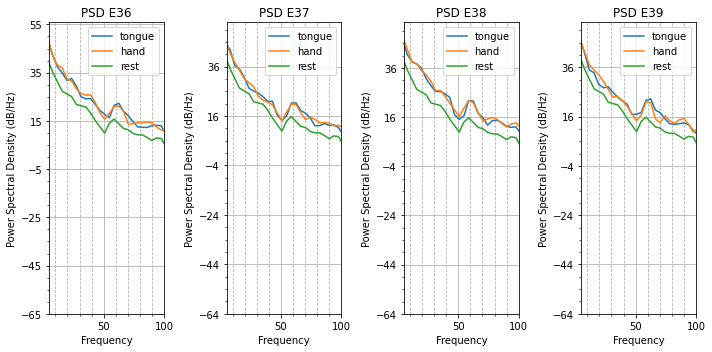

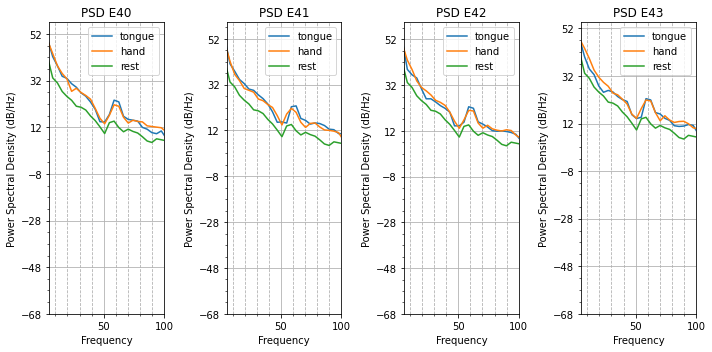

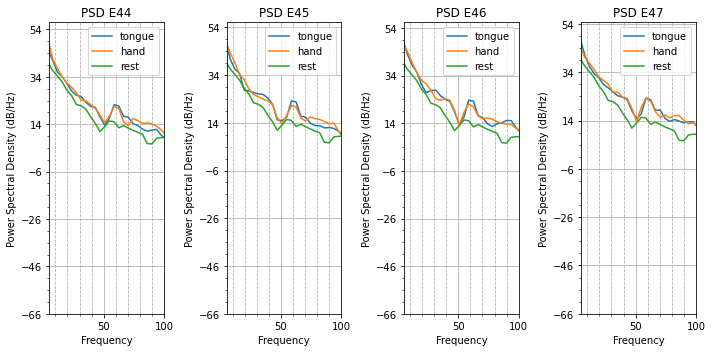

In [13]:
#from matplotlib.ticker import AutoMinorLocator, MultipleLocator
#minor = AutoMinorLocator()
for i in range(0,45, 4):
    
    

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,5))

    ax1.psd(np.mean(data_2[np.where(data["y"] == 11)[0], i, :], axis=0), Fs=1000, label="tongue")
    ax1.psd(np.mean(data_2[np.where(data["y"] == 12)[0], i, :], axis=0), Fs=1000, label="hand")
    ax1.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")
    
    ax1.grid(which = "minor", linestyle='--', axis="x")
    ax1.legend()
    ax1.minorticks_on()
    ax1.set_xlim(5, 100)
    ax1.set_title("PSD E" + str(i))
    
    ax2.psd(np.mean(data_2[np.where(data["y"] == 11)[0], i+1, :], axis=0), Fs=1000, label="tongue")
    ax2.psd(np.mean(data_2[np.where(data["y"] == 12)[0], i+1, :], axis=0), Fs=1000, label="hand")
    ax2.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")
    
    ax2.grid(which = "minor", linestyle='--', axis="x")
    ax2.legend()
    ax2.minorticks_on()
    ax2.set_xlim(5, 100)
    ax2.set_title("PSD E" + str(i+1))
    
    ax3.psd(np.mean(data_2[np.where(data["y"] == 11)[0], i+2, :], axis=0), Fs=1000, label="tongue")
    ax3.psd(np.mean(data_2[np.where(data["y"] == 12)[0], i+2, :], axis=0), Fs=1000, label="hand")
    ax3.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")
    
    ax3.grid(which = "minor", linestyle='--', axis="x")
    ax3.legend()
    ax3.minorticks_on()
    ax3.set_xlim(5, 100)
    ax3.set_title("PSD E" + str(i+2))
    
    plot.minorticks_on()
    
    ax4.psd(np.mean(data_2[np.where(data["y"] == 11)[0], i+3, :], axis=0), Fs=1000, label="tongue")
    ax4.psd(np.mean(data_2[np.where(data["y"] == 12)[0], i+3, :], axis=0), Fs=1000, label="hand")
    ax4.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")
    
    ax4.grid(which = "minor", linestyle='--', axis="x")
    ax4.legend()
    ax4.minorticks_on()
    ax4.set_xlim(5, 100)
    ax4.set_title("PSD E" + str(i+3))
    
    plot.tight_layout()
    
    

<Figure size 432x288 with 0 Axes>

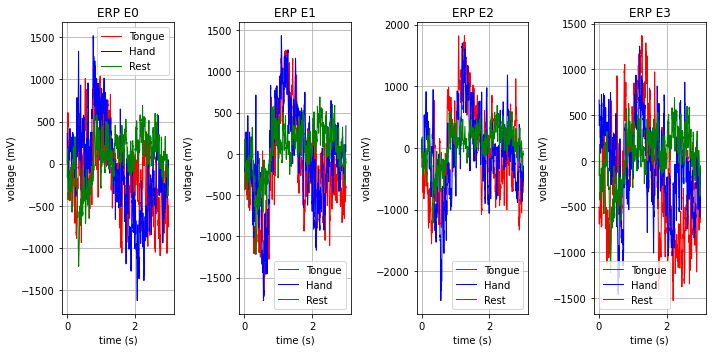

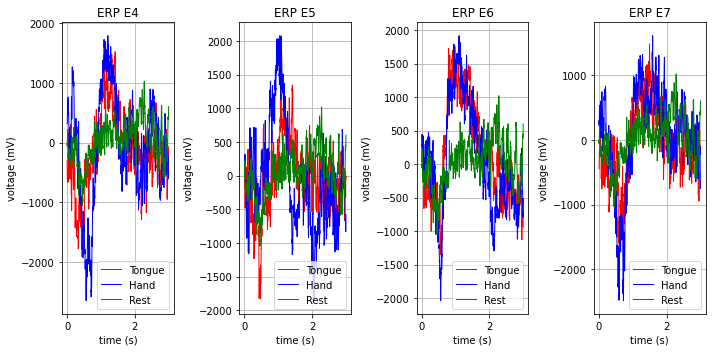

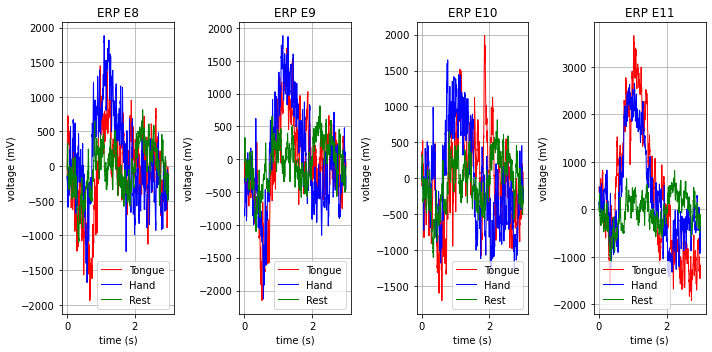

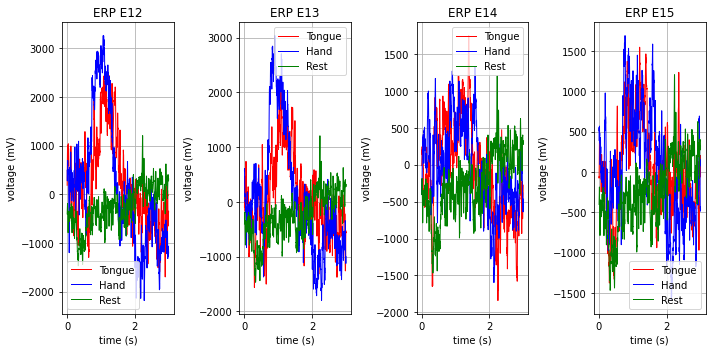

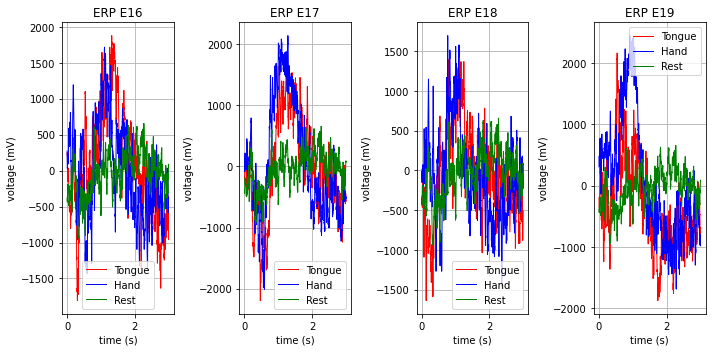

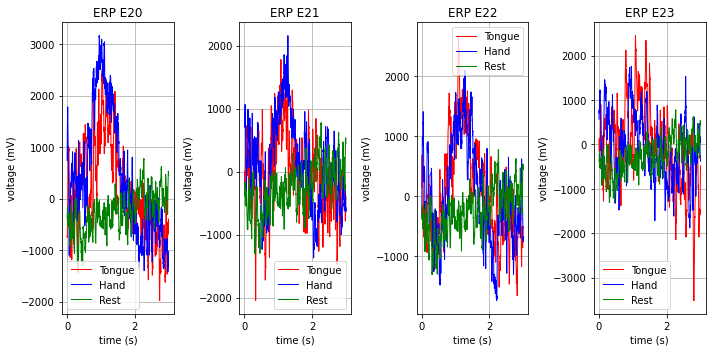

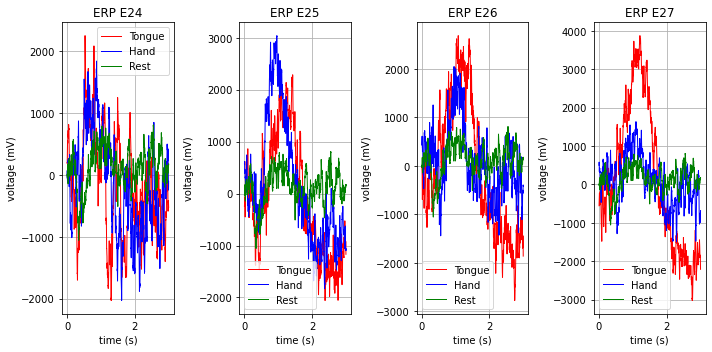

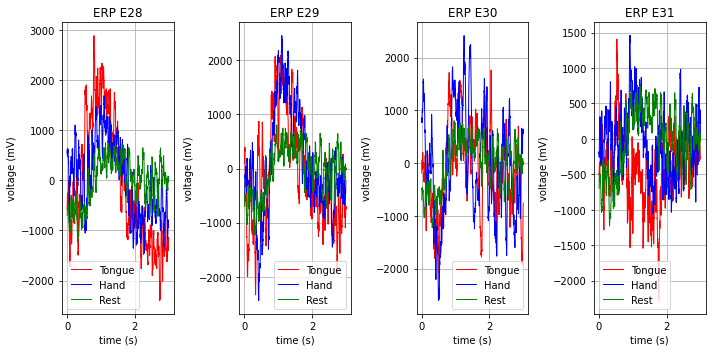

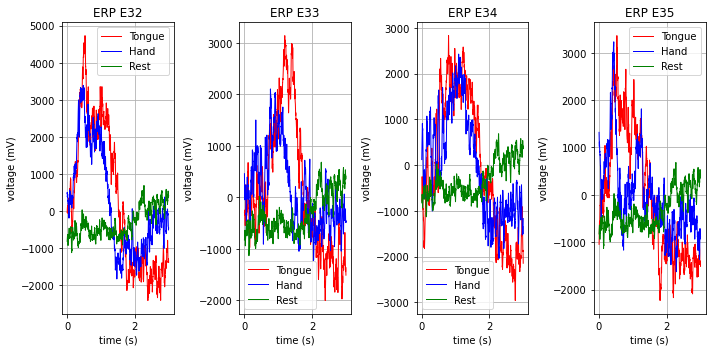

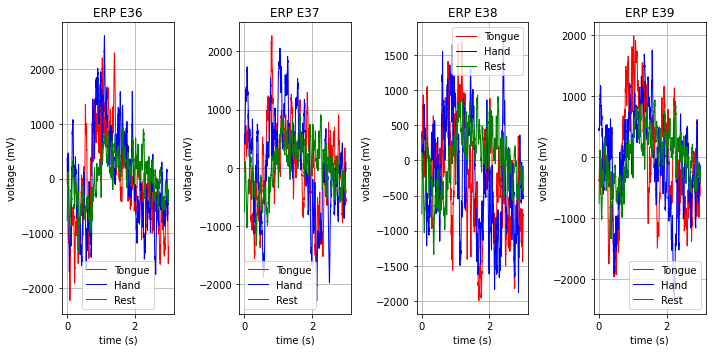

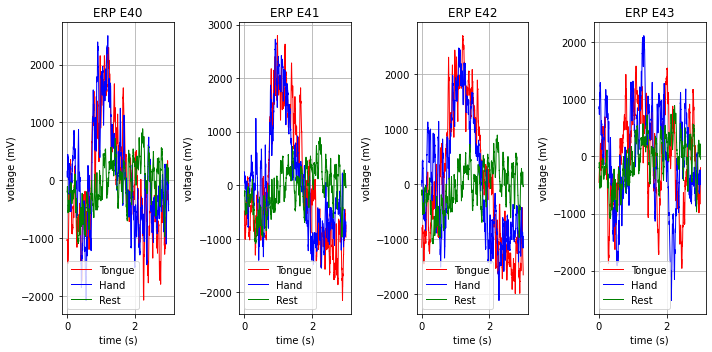

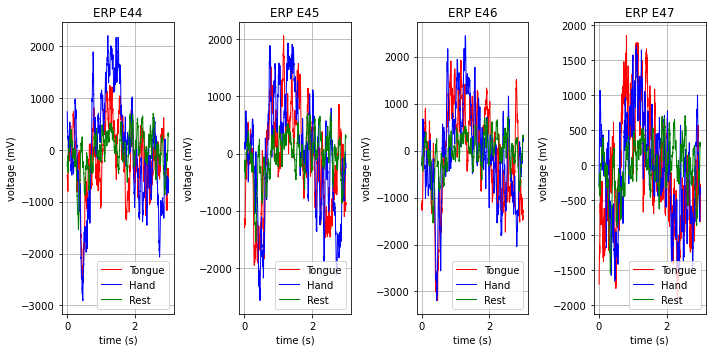

In [14]:
#for i in range(0, 3):


for i in range(0,45,4):
    #figure(figsize=(20,100))
    mysignals1 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 11)[0], i, :], axis=0), 'color':'r', 'linewidth':1},
                {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 12)[0], i, :], axis=0), 'color':'b', 'linewidth':1},
                {'name': 'Rest', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 0)[0], i, :], axis=0), 'color':'g', 'linewidth':1},
                ]

    mysignals2 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 11)[0], i+1, :], axis=0), 'color':'r', 'linewidth':1},
                {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 12)[0], i+1, :], axis=0), 'color':'b', 'linewidth':1},
                {'name': 'Rest', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 0)[0], i, :], axis=0), 'color':'g', 'linewidth':1},
                ]

    mysignals3 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 11)[0], i+2, :], axis=0), 'color':'r', 'linewidth':1},
                {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 12)[0], i+2, :], axis=0), 'color':'b', 'linewidth':1},
                {'name': 'Rest', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 0)[0], i, :], axis=0), 'color':'g', 'linewidth':1},
                 ]

    mysignals4 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 11)[0], i+3, :], axis=0), 'color':'r', 'linewidth':1},
                {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 12)[0], i+3, :], axis=0), 'color':'b', 'linewidth':1},
                {'name': 'Rest', 'x': np.arange(0.0,3.0,0.001),
                 'y': np.mean(data_2[np.where(data["y"] == 0)[0], i, :], axis=0), 'color':'g', 'linewidth':1},
                 ]

    plot.tight_layout()

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,5))
    for signal in mysignals1:
        ax1.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

    # Enable legend
    ax1.legend()
    ax1.grid()
    ax1.set(xlabel='time (s)', ylabel='voltage (mV)')
    ax1.set_title("ERP E" + str(i))
    #plt.show()
    #plot.tight_layout()

    for signal in mysignals2:
        ax2.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

    # Enable legend
    ax2.legend()
    ax2.grid()
    ax2.set(xlabel='time (s)', ylabel='voltage (mV)')
    ax2.set_title("ERP E" + str(i+1))

    for signal in mysignals3:
        ax3.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

    # Enable legend
    ax3.legend()
    ax3.grid()
    ax3.set(xlabel='time (s)', ylabel='voltage (mV)')
    ax3.set_title("ERP E" + str(i+2))

    for signal in mysignals4:
        ax4.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

    # Enable legend
    ax4.legend()
    ax4.grid()
    ax4.set(xlabel='time (s)', ylabel='voltage (mV)')
    ax4.set_title("ERP E" + str(i+3))

    plot.tight_layout()
    #plt.show()